#Bitcoin Price Prediction with Facebook Prophet

In [1]:
#import packages & libraries
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
#initialize plotly
import plotly.io as pio
pio.renderers.default = 'colab'

## Exploratory Data Analysis

In [6]:
#read dataset
df = pd.read_csv('bitcoin_data.csv')
df.head(10)

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
5,1/6/2016,430.87
6,1/7/2016,459.07
7,1/8/2016,454.44
8,1/9/2016,450.38
9,1/10/2016,449.99


In [4]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1705 non-null   object 
 1   Close   1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [5]:
#get statistics
df.describe()

,Close
count,1705.000000
mean,5455.314499
std,3962.263892
min,357.530000
25%,1062.150000
50%,6005.050000
75%,8624.280000
max,19650.010000


# Data Visualization 

In [7]:
#area graph (Date Vs Price)
px.area(df,
        x='Date',
        y='Close')

In [8]:
#violin plot
px.violin(df,
          y='Close')

## Data Preperation

In [9]:
#get columns' names
df.columns

Index(['Date', 'Close'], dtype='object')

In [11]:
#rename columns
prophet_df = df.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

## Train Model

In [12]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [13]:
#forecast for the next 30 days
future = model.make_future_dataframe(periods=30)

#predict
forecast = model.predict(future)

In [14]:
#check out forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1024.030928,-142.165601,2939.853927,1024.030928,1024.030928,367.408771,367.408771,367.408771,-3.507518,-3.507518,-3.507518,370.916288,370.916288,370.916288,0.0,0.0,0.0,1391.439699
1,2016-01-02,1020.292562,-18.649155,2834.244281,1020.292562,1020.292562,346.875581,346.875581,346.875581,15.230811,15.230811,15.230811,331.644769,331.644769,331.644769,0.0,0.0,0.0,1367.168143
2,2016-01-03,1016.554196,-117.661526,2856.828123,1016.554196,1016.554196,285.749738,285.749738,285.749738,-8.815516,-8.815516,-8.815516,294.565254,294.565254,294.565254,0.0,0.0,0.0,1302.303934
3,2016-01-04,1012.815830,-118.817224,2850.227104,1012.815830,1012.815830,278.664345,278.664345,278.664345,18.789796,18.789796,18.789796,259.874549,259.874549,259.874549,0.0,0.0,0.0,1291.480175
4,2016-01-05,1009.077464,-260.499255,2659.976186,1009.077464,1009.077464,223.224561,223.224561,223.224561,-4.414476,-4.414476,-4.414476,227.639038,227.639038,227.639038,0.0,0.0,0.0,1232.302026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2020-09-26,9075.188181,7451.860569,10487.785019,9011.504377,9132.254146,-89.368894,-89.368894,-89.368894,15.230811,15.230811,15.230811,-104.599705,-104.599705,-104.599705,0.0,0.0,0.0,8985.819287
1731,2020-09-27,9075.741437,7607.506790,10410.003234,9004.521364,9140.414058,-151.230902,-151.230902,-151.230902,-8.815516,-8.815516,-8.815516,-142.415387,-142.415387,-142.415387,0.0,0.0,0.0,8924.510535
1732,2020-09-28,9076.294693,7445.020070,10357.898530,8999.658084,9147.413944,-161.199556,-161.199556,-161.199556,18.789796,18.789796,18.789796,-179.989353,-179.989353,-179.989353,0.0,0.0,0.0,8915.095136
1733,2020-09-29,9076.847948,7437.469105,10258.668965,8993.625212,9157.344305,-221.420979,-221.420979,-221.420979,-4.414476,-4.414476,-4.414476,-217.006503,-217.006503,-217.006503,0.0,0.0,0.0,8855.426969


In [15]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          1735 non-null   datetime64[ns]
 1   trend                       1735 non-null   float64       
 2   yhat_lower                  1735 non-null   float64       
 3   yhat_upper                  1735 non-null   float64       
 4   trend_lower                 1735 non-null   float64       
 5   trend_upper                 1735 non-null   float64       
 6   additive_terms              1735 non-null   float64       
 7   additive_terms_lower        1735 non-null   float64       
 8   additive_terms_upper        1735 non-null   float64       
 9   weekly                      1735 non-null   float64       
 10  weekly_lower                1735 non-null   float64       
 11  weekly_upper                1735 non-null   float64     

In [16]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.0,1735.0,1735.0,1735.000000
mean,5519.261716,4056.432886,6988.517001,5518.863293,5519.581535,3.688204,3.688204,3.688204,0.010612,0.010612,0.010612,3.677592,3.677592,3.677592,0.0,0.0,0.0,5522.949921
std,3616.040496,3695.101494,3695.145045,3615.651798,3616.357752,707.732623,707.732623,707.732623,12.157481,12.157481,12.157481,707.627085,707.627085,707.627085,0.0,0.0,0.0,3694.603631
min,209.067181,-2297.400464,625.648202,209.067181,209.067181,-1533.313925,-1533.313925,-1533.313925,-18.411802,-18.411802,-18.411802,-1515.546551,-1515.546551,-1515.546551,0.0,0.0,0.0,-819.567344
25%,1411.452344,-146.974155,2796.071279,1411.452344,1411.452344,-483.320954,-483.320954,-483.320954,-8.815516,-8.815516,-8.815516,-478.464413,-478.464413,-478.464413,0.0,0.0,0.0,1314.736395
50%,6087.083322,4547.744581,7493.573227,6087.083322,6087.083322,54.500728,54.500728,54.500728,-3.507518,-3.507518,-3.507518,56.379034,56.379034,56.379034,0.0,0.0,0.0,5997.308502
75%,8929.405312,7266.173550,10213.174953,8929.405312,8929.405312,608.768650,608.768650,608.768650,15.230811,15.230811,15.230811,611.593064,611.593064,611.593064,0.0,0.0,0.0,8734.837585
max,11207.221343,10519.953717,13467.924220,11207.221343,11207.221343,1329.632136,1329.632136,1329.632136,18.789796,18.789796,18.789796,1312.157379,1312.157379,1312.157379,0.0,0.0,0.0,11939.119698


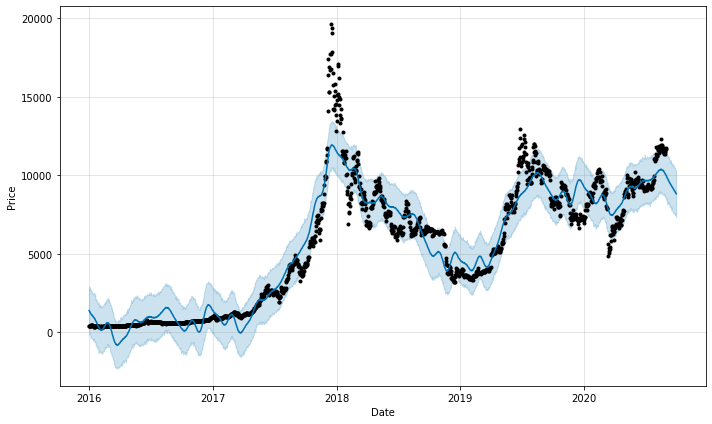

In [17]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

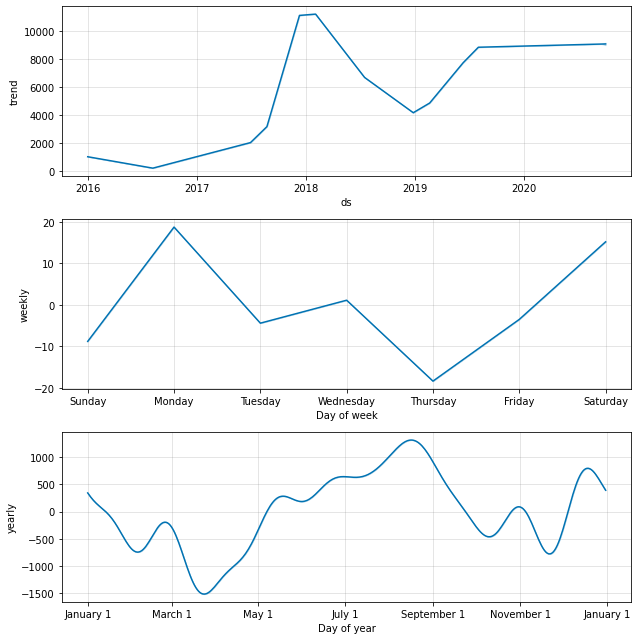

In [18]:
#visualize forecast
figure_2 = model.plot_components(forecast)

In [19]:
#convert dataset into csv file
forecast.to_csv('bitcoin_forecast.csv')

#download dataset
from google.colab import files
files.download('bitcoin_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>